# GTM Seymour 
## Yearly Rainfall Statitic Estimation

Data from Environmment Canada Monthly and Daily Averages 

Project #02202605.001

Created  by Laurianne Roy
Date: 2023-06-01


Objective: To estimate precipitation at Seymour futur mining site based on surrounding climate stations. The inverse average weighting with a p-value of 2 is used. 


How to use: Drop Environment Canada weather files in one folder, adjust code input directory and enter location coordinates.  


In [2]:
## Importing Necessary Libraries
import pandas as pd ## Libraries for data manipulation
import datetime as dt ## Library for manipulating time series
import matplotlib.pyplot as plt ## Library for plotting
import numpy as np ## Library to deal with matrix related calculation
import pingouin as pg ## Library for statistical analysis
import scipy ## Library for statistical analysis
import os ## library to manage directories 
import re ## regular expressions library 
import geopy.distance## Calculates distance

## Data filtering and Gathering 

In [3]:
## Directory can be adjut to calculate for different locations 
dir_list = os.listdir("../Data/GTM_Seymour/Climate_data")

location = pd.DataFrame(columns = ["Climate ID", "Station Name", "Longitude (x)", "Latitude (y)", "Available Date Range"])


## For loops that goes to file in the folder, retreive needed information and aggregate precipitations values together
# in a single table.

for ind in np.arange(len(dir_list)):
    # Import Data
    dir1 = "../Data/GTM_Seymour/Climate_data/" + dir_list[ind]
    new_precip = pd.read_csv(dir1, index_col = "Date/Time")
    ##Keeping location ID name and coordinates for future calculations
    location.loc[ind] = new_precip[["Climate ID", "Station Name", "Longitude (x)", "Latitude (y)"]].iloc[0]
    ## Identifying date range
    date = re.search(r"\d{4}-\d{4}", dir1)
    date = date.group()
    location.loc[ind, "Available Date Range"]  = date
    
    #Changing index to datetime index (easier to manipulate)
    new_precip.index = pd.to_datetime(new_precip.index)
    
    #Selecting only precipitation
    new_precip = new_precip [["Total Precip (mm)"]]

    # REGEX TO GET IDs
    ID = re.search(r"\d{7}", dir1 ) 
    ID = ID.group()
    new_precip = new_precip.rename(columns= {"Total Precip (mm)": ID})
    
    #Filltering out year with less than 12 months of data
    dt = new_precip.groupby(new_precip.index.year).count() 
    good_year = dt[dt[ID] ==12].index
    new_precip = new_precip[new_precip.index.year.isin(good_year)]

    if ind == 0:
        precip = new_precip
    else:
        precip = pd.concat([precip, new_precip]) # adding station precipitation to main precipitation table 
        
precip.sort_index(inplace = True)
precip

,6011305,6016527,6040022,6040322,6040325,6040330,6040572,6040785,6040786,6041109,6041110,6042716,6044735,6045550,6045572,6046549,6046989,6048175,6049175
Date/Time,,,,,,,,,,,,,,,,,,,
1925-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## Summary of Stations 
location.to_csv("station_summary.csv")
location


,Climate ID,Station Name,Longitude (x),Latitude (y),Available Date Range
0,6011305,CENTRAL PATRICIA,-90.15,51.5,1953-1978
1,6016527,PICKLE LAKE A,-90.21,51.45,1990-2012
2,6040022,ABITIBI CAMP 300,-89.75,49.63,1978-1986
3,6040322,ARMSTRONG,-89.15,50.28,1926-1947
4,6040325,ARMSTRONG (AUT),-88.91,50.29,1938-1982
5,6040330,ARMSTRONG JELLIEN,-89.1,50.25,1987-1992
6,6040572,BEARDMORE,-87.95,49.62,1973-1986
7,6040785,BLACK STURGEON LAKE,-88.85,49.32,1951-1968
8,6040786,BLACK STURGEON LAKE 2,-88.8,49.3,1968-1971
9,6041109,CAMERON FALLS,-88.35,49.15,1924-1998


In [5]:
#Dropping Duplicates and calculating number of values per dates 
sum_precip = pd.DataFrame(columns = precip.columns)
precip["value_count"] = 0

for row in precip.index.drop_duplicates():
    add = precip.loc[[row]].mean()
    sum_precip.loc[row] = add
    sum_precip.loc[row, "value_count"] = len(sum_precip.columns) - 1 - sum_precip.loc[row].isna().sum().sum()
sum_precip

,6011305,6016527,6040022,6040322,6040325,6040330,6040572,6040785,6040786,6041109,6041110,6042716,6044735,6045550,6045572,6046549,6046989,6048175,6049175,value_count
1925-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1925-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1925-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1925-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1925-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
#Filtering Value With at least 3 data point
good_precip = sum_precip[sum_precip["value_count"] >= 3]
good_precip.head()

,6011305,6016527,6040022,6040322,6040325,6040330,6040572,6040785,6040786,6041109,6041110,6042716,6044735,6045550,6045572,6046549,6046989,6048175,6049175,value_count
1933-01-01,NaN,NaN,NaN,41.9,NaN,NaN,NaN,NaN,NaN,40.4,NaN,NaN,40.6,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1933-02-01,NaN,NaN,NaN,19.8,NaN,NaN,NaN,NaN,NaN,20.1,NaN,NaN,15.2,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1933-03-01,NaN,NaN,NaN,34.3,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,37.8,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1933-04-01,NaN,NaN,NaN,38.1,NaN,NaN,NaN,NaN,NaN,87.6,NaN,NaN,31.5,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1933-05-01,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,59.4,NaN,NaN,80.8,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [7]:
#Grouping and Summing by year
yearly_precip = good_precip.groupby(good_precip.index.year).sum()

#Transpose table to facilitate computations 
station_precip = yearly_precip.drop("value_count", axis= 1).transpose()
station_precip

,1933,1936,1939,1940,1941,1942,1943,1944,1945,1947,...,1994,1995,1996,2000,2001,2002,2003,2004,2005,2006
6011305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6016527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,657.1,666.6,813.7,653.4,824.4,788.9,637.4,933.1,904.0,703.6
6040022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040322,682.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040325,0.0,0.0,676.2,519.1,0.0,0.0,639.1,542.5,861.8,687.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6041109,718.8,611.4,472.1,486.8,778.0,663.8,631.6,855.1,0.0,608.1,...,752.0,825.9,911.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Calculating Distance from station
lat_seymour = 50.38
lon_seymour = -88.45

coord_sey = (lat_seymour, lon_seymour)

location["Coord"] = list(zip(pd.to_numeric(location["Latitude (y)"]), pd.to_numeric(location["Longitude (x)"])))

location["Distance from Seymour"] = "NaN"

for ind in np.arange(len(location)):
    location.loc[ind, "Distance from Seymour"] = round(geopy.distance.geodesic(location.loc[ind, "Coord"], coord_sey).km)

    ## Changing data type for join to work 
location["Climate ID"] = location["Climate ID"].astype("str")
 

location 

,Climate ID,Station Name,Longitude (x),Latitude (y),Available Date Range,Coord,Distance from Seymour
0,6011305,CENTRAL PATRICIA,-90.15,51.5,1953-1978,"(51.5, -90.15)",173
1,6016527,PICKLE LAKE A,-90.21,51.45,1990-2012,"(51.45, -90.21)",172
2,6040022,ABITIBI CAMP 300,-89.75,49.63,1978-1986,"(49.63, -89.75)",125
3,6040322,ARMSTRONG,-89.15,50.28,1926-1947,"(50.28, -89.15)",51
4,6040325,ARMSTRONG (AUT),-88.91,50.29,1938-1982,"(50.29, -88.91)",34
5,6040330,ARMSTRONG JELLIEN,-89.1,50.25,1987-1992,"(50.25, -89.1)",49
6,6040572,BEARDMORE,-87.95,49.62,1973-1986,"(49.62, -87.95)",92
7,6040785,BLACK STURGEON LAKE,-88.85,49.32,1951-1968,"(49.32, -88.85)",121
8,6040786,BLACK STURGEON LAKE 2,-88.8,49.3,1968-1971,"(49.3, -88.8)",123
9,6041109,CAMERON FALLS,-88.35,49.15,1924-1998,"(49.15, -88.35)",137


In [14]:
#Adding distance to precipitation columns
station_precip_dist = station_precip.merge(location[["Climate ID", "Distance from Seymour"]], how= "left", left_index= True, right_on= "Climate ID")
station_precip_dist.head()

,1933,1936,1939,1940,1941,1942,1943,1944,1945,1947,...,1996,2000,2001,2002,2003,2004,2005,2006,Climate ID,Distance from Seymour
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6011305,173
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,813.7,653.4,824.4,788.9,637.4,933.1,904.0,703.6,6016527,172
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6040022,125
3,682.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6040322,51
4,0.0,0.0,676.2,519.1,0.0,0.0,639.1,542.5,861.8,687.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6040325,34


## Inverse Weighting

In [21]:


## Adding empty column for 
station_precip_dist.loc["Precip (mm)"] = 0


## Adding column for bottom part of inverse weighting formula with a p of 2 (1/squared distance )

for year in station_precip_dist.columns[:-2]:
    x = pd.to_numeric(station_precip_dist[station_precip_dist[year] != 0][year]) # Precipitation at year with values 
    d2 = pd.to_numeric(station_precip_dist[station_precip_dist[year] != 0]["Distance from Seymour"]**2) ## squared distance for same year

    station_precip_dist.loc["Precip (mm)", year] = round(sum(x/d2)/sum(1/d2), 1 ) ## Applying inverse distance
    
precip_seymour = station_precip_dist.loc[["Precip (mm)"]].transpose().iloc[:-2] ## Putting it in a nicer format 
print(len(precip_seymour))

precip_seymour


57


,Precip (mm)
1933,692.3
1936,592.0
1939,668.8
1940,538.4
1941,910.8
1942,673.4
1943,648.9
1944,606.2
1945,818.3
1947,668.7


[]

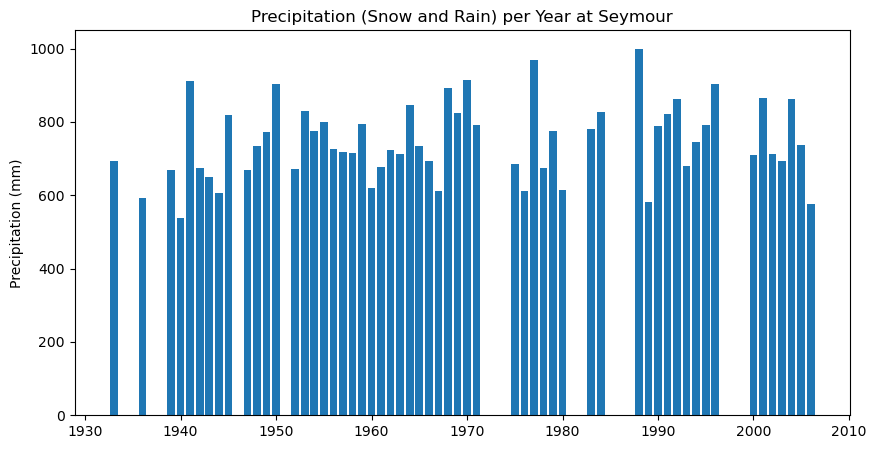

In [22]:
## PLotting Figure
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x = precip_seymour.index, height= precip_seymour["Precip (mm)"])
ax.set_title("Precipitation (Snow and Rain) per Year at Seymour")
ax.set_ylabel("Precipitation (mm)")

plt.plot()

## Statistical Analysis

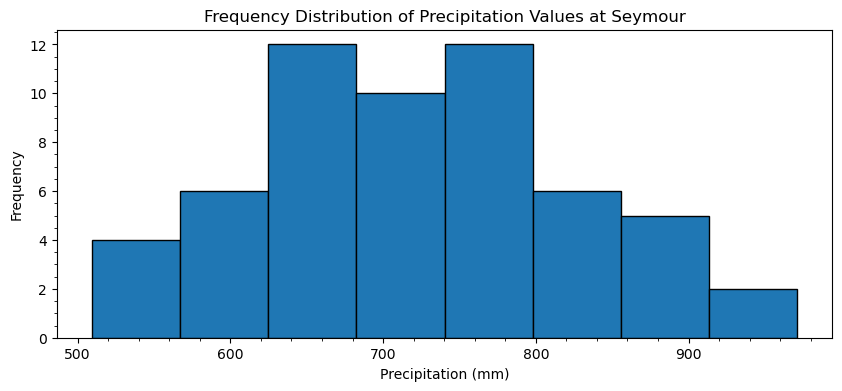

In [24]:
## Histogram 
# Plot of data
H, edges = np.histogram(precip_seymour, bins= 8)
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H , width=edges[1] - edges[0], edgecolor = "black")


ax.set_xlabel("Precipitation (mm)")
ax.set_ylabel("Frequency")
ax.set_title("Frequency Distribution of Precipitation Values at Seymour")
ax.minorticks_on()
plt.show()


In [26]:
## Getting the 1:20 and 1:100 extrapolated values 

## 1 in a 20 or 0.05 chance
z_score20 = scipy.stats.norm.ppf(0.95)

## 1 in a 100
z_score100 = scipy.stats.norm.ppf(0.999)

## Base Stats 
avg = precip_seymour.mean()
std = precip_seymour.std()

wet_120 = z_score20 * std  + avg
dry_120 = -z_score20 * std  + avg
wet_1100 = z_score100 * std  + avg

##Table 
summary = pd.DataFrame()
summary["Average"] = avg
summary["Standard Deviation"] = std
summary["Max"] = precip_seymour.max()
summary["Max Year"] = precip_seymour[precip_seymour == precip_seymour.max()].dropna().iloc[0].name
summary["Min"] = precip_seymour.min()
summary["Min Year"] = precip_seymour[precip_seymour == precip_seymour.min()].dropna().iloc[0].name
summary["1/20 Wet Year"] = wet_120
summary["1/20 Dry Year"] = dry_120
summary["1/100 Wet Year"] = wet_1100


##add min and max 
# summary.to_csv("stat_test.csv")
summary.round(1)

,Average,Standard Deviation,Max,Max Year,Min,Min Year,1/20 Wet Year,1/20 Dry Year,1/100 Wet Year
Precip (mm),746.8,104.7,999.7,1988,538.4,1940,919.0,574.5,1070.4


### Ideas-
- Add Year used to the table and Year Missing 
- Deal with nearby stations
- Do some stats on the data to remove outliers
- Add Daily Values
- Improve plot of Data 
- Learn How to better Share it


## First draft:
Calculation for testing before running official Code 

In [8]:
used_year = yearly_precip[yearly_precip != 0]["6011305"].dropna().index
#Funtion to look at Data Range (Wanted to see what range of year was kept for each station but messier than expected)
# Maybe could do a graph instead 
# Not Very Efficient 

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

for ranges in consecutive(used_year):
    print(list(ranges))

[1954, 1955]
[1957, 1958, 1959, 1960]
[1963, 1964, 1965, 1966, 1967, 1968, 1969]
[1971]
[1975, 1976, 1977]


In [15]:
### First import method when only a few file

# # Import Data from Excel File

# #Pickle Lake 6016527
# PL = pd.read_csv("../Data/GTM_Seymour/Climate_data/en_climate_monthly_ON_6016527_1990-2012_P1M.csv", index_col= "Date/Time")
# #add prefix
# PL = PL.add_prefix("PL_")

# # Geraldton A
# GA= pd.read_csv("../Data/GTM_Seymour/Climate_data/en_climate_monthly_ON_6042716_1981-2015_P1M.csv", index_col= "Date/Time")
# # Geraldton A (AUT)
# #add prefix
# GA= GA.add_prefix("GA_")

# # AEMSTRONG AUT
# AA= pd.read_csv("../Data/GTM_Seymour/Climate_data/en_climate_monthly_ON_6040325_1938-1982_P1M.csv", index_col= "Date/Time")
# # Geraldton A (AUT)
# #add prefix
# AA= GA.add_prefix("AA_")

# #Cameron Falls
# CF1= pd.read_csv("../Data/GTM_Seymour/Climate_data/en_climate_monthly_ON_6041109_1924-1998_P1M.csv")
# #add prefix
# CF1 = CF1.add_prefix("CF_")
# #Cameron Falls 2
# CF2 = pd.read_csv("../Data/GTM_Seymour/Climate_data/en_climate_monthly_ON_6041110_1998-2006_P1M.csv")
# #add prefix
# CF2 = CF2.add_prefix("CF_")


In [16]:
# Combining Same location data and removing duplicates
CF = pd.concat([CF1,CF2]).reset_index()
CF = CF.loc[CF["CF_Date/Time"].drop_duplicates().index, :]
CF.index = CF["CF_Date/Time"]

NameError: name 'CF1' is not defined

In [ ]:
#Change index to date time
for station in [PL, CF, GA, AA]:
    station.index = pd.to_datetime(station.index)

# #Only keep precip intersection range (1990-1998)
monthly_precip = pd.concat([PL, CF, GA], join = "outer", axis = 1)[["GA_Total Precip (mm)","PL_Total Precip (mm)","CF_Total Precip (mm)"]]

# # Adding month column
monthly_precip

In [ ]:
### Choosing Data for the 50 year (will need NaN values )

## Explorinfg 1998 (weirdly low)
monthly_precip[monthly_precip.index.year == 1998]


In [ ]:
# Adding month column
(monthly_precip
.groupby(monthly_precip.index.strftime('%y-%m'))).sum()



In [ ]:
#Summing Years
yearly_precip = monthly_precip.groupby(monthly_precip.index.year).sum()
# Averaging with inverse weighing distance
yprecip = yearly_precip
yprecip

In [ ]:
## Inverse Weighing 
dist_GA = 127 #km
dist_PL = 171#km
dist_CF = 137 #km

tot_d = dist_GA + dist_PL + dist_CF

Seymour = dist_GA/tot_d * yprecip["GA_Total Precip (mm)"] + dist_PL/tot_d * yprecip["PL_Total Precip (mm)"] + dist_CF/tot_d * yprecip["CF_Total Precip (mm)"] 
Seymour

In [ ]:
## Histogram and Normality Test

# Plot of Pre-pandemic data
H, edges = np.histogram(Seymour, bins= 8)
plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H , width=edges[1] - edges[0], edgecolor = "black")


ax.set_xlabel("Precipitation mm)")
ax.set_ylabel("Frequency")
ax.minorticks_on()
plt.show()


## Will just be assumed normal Not Enough Data Anyway

In [ ]:
## Getting the 1 in 30 and 1 in a hundred extrapolated values 

## 1 in a 20 or 0.05 chane
z_score20 = scipy.stats.norm.ppf(0.95)
## 1 in a 100
z_score100 = scipy.stats.norm.ppf(0.999)

## base Stats 
avg = Seymour.mean()
std = Seymour.std()

wet_120 = z_score20 * std  + avg
dry_120 = -z_score20 * std  + avg
wet_1100 = z_score100 * std  + avg


print(wet_120)
print(dry_120)
print(wet_1100)

In [ ]:
avg

In [ ]:
Seymour.median()

In [ ]:
Aim for 5 stations and get at 50 data points (to have least 3 stations)